In [1]:
import pandas as pd
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

In [2]:
# Reading data as pandas dataframe
# frame =  pd.read_json('fake_or_real_news.json')
frame = pd.read_csv('fake_or_real_news.csv')
# frame = pd.read_csv('fake.csv')


#Inspecing Shape
frame.size
frame.shape

# Inspecting top 5 rows
frame.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Inspecting last 10 rows
frame.tail(10)

,Unnamed: 0,title,text,label
6325,8411,Will the Media Reset After the Election or Are...,Written by Peter Van Buren venerable New Yor...,FAKE
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6327,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [4]:
# Setting the DataFrame index (row labels) using one or more existing columns
frame = frame.set_index("Unnamed: 0")
frame.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
y = frame.label
y.head()

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [6]:
frame.drop("label", axis=1)
frame.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
X_train, X_test, y_train, y_test = train_test_split(frame['text'], y, test_size=0.33, random_state=53)

In [8]:
X_train.head()

Unnamed: 0
8055                                                     
5656    Report Copyright Violation Do you think there ...
669     The election in 232 photos, 43 numbers and 131...
5630    Email Ever wonder what’s on the mind of today’...
9797    Wells Fargo is Rotting from the Top Down Wells...
Name: text, dtype: object

In [9]:
y_train.head()

Unnamed: 0
8055    FAKE
5656    FAKE
669     REAL
5630    FAKE
9797    FAKE
Name: label, dtype: object

In [10]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english') # will remove English stop words from the data before making vectors.

# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [11]:
print(count_test)

  (0, 2385)	1
  (0, 3184)	1
  (0, 4067)	1
  (0, 4919)	1
  (0, 5460)	2
  (0, 7383)	1
  (0, 7422)	1
  (0, 7464)	1
  (0, 10525)	1
  (0, 10673)	2
  (0, 10984)	1
  (0, 10985)	2
  (0, 12457)	1
  (0, 12601)	1
  (0, 13343)	1
  (0, 14163)	1
  (0, 14446)	1
  (0, 14867)	1
  (0, 15085)	1
  (0, 15285)	1
  (0, 15812)	1
  (0, 15870)	1
  (0, 15942)	2
  (0, 16027)	4
  (0, 16580)	1
  :	:
  (2090, 52119)	1
  (2090, 52134)	2
  (2090, 52193)	3
  (2090, 52290)	1
  (2090, 52661)	1
  (2090, 52926)	2
  (2090, 52948)	1
  (2090, 53308)	1
  (2090, 53607)	1
  (2090, 53792)	4
  (2090, 54120)	1
  (2090, 54171)	1
  (2090, 54393)	2
  (2090, 54647)	5
  (2090, 54699)	1
  (2090, 54746)	1
  (2090, 54822)	3
  (2090, 54850)	1
  (2090, 54936)	2
  (2090, 55614)	1
  (2090, 55764)	2
  (2090, 55773)	1
  (2090, 55858)	1
  (2090, 56196)	1
  (2090, 56512)	1


In [12]:
print(count_train)

  (1, 36831)	1
  (1, 47506)	1
  (1, 38823)	1
  (1, 25684)	1
  (1, 21568)	1
  (1, 36087)	1
  (1, 16814)	1
  (1, 49203)	2
  (1, 25686)	1
  (1, 15927)	2
  (1, 29531)	2
  (1, 8399)	1
  (1, 42534)	1
  (1, 21881)	1
  (1, 35256)	1
  (1, 35783)	4
  (1, 51896)	2
  (1, 44520)	2
  (1, 15924)	2
  (1, 50628)	1
  (1, 54177)	1
  (1, 12105)	1
  (1, 42470)	1
  (2, 9445)	1
  (2, 8779)	1
  :	:
  (4243, 30464)	1
  (4243, 35836)	2
  (4243, 48084)	2
  (4243, 22146)	1
  (4243, 9042)	2
  (4243, 35190)	2
  (4243, 52934)	1
  (4243, 35037)	1
  (4243, 55388)	2
  (4243, 43875)	1
  (4243, 43172)	1
  (4243, 3441)	1
  (4243, 35035)	1
  (4243, 11982)	2
  (4243, 39633)	4
  (4243, 22069)	1
  (4243, 7184)	1
  (4243, 14871)	1
  (4243, 41311)	1
  (4243, 50690)	1
  (4243, 27842)	1
  (4243, 37695)	1
  (4243, 38823)	1
  (4243, 51896)	6
  (4243, 50628)	1


In [13]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [14]:
print(tfidf_test)

  (0, 56196)	0.043317993781946
  (0, 56091)	0.032700334892684514
  (0, 55858)	0.05420932672571138
  (0, 55358)	0.059873902121258926
  (0, 55027)	0.048465128413932454
  (0, 54772)	0.06742854646276102
  (0, 54647)	0.03727533728426692
  (0, 54484)	0.1271579409566499
  (0, 54400)	0.05200707680397371
  (0, 54182)	0.17039563890103226
  (0, 52193)	0.050614987002584974
  (0, 52166)	0.09946716362549408
  (0, 52164)	0.07141989873688631
  (0, 51896)	0.09946458588236584
  (0, 51083)	0.06988430196901438
  (0, 50973)	0.11421142130023298
  (0, 50920)	0.08108261495679815
  (0, 50712)	0.07153047197062776
  (0, 50690)	0.05024667107829908
  (0, 50627)	0.04286648720912277
  (0, 48965)	0.06202757667895662
  (0, 48929)	0.17556869825083593
  (0, 46631)	0.14220349264725846
  (0, 46621)	0.10706347107534141
  (0, 44522)	0.040932482324428275
  :	:
  (2090, 5969)	0.03303772830203347
  (2090, 5576)	0.04943418930560652
  (2090, 5530)	0.05752451982231977
  (2090, 4919)	0.026792001261175008
  (2090, 4321)	0.038896002

In [15]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [16]:
# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[0:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [17]:
# Count versus TF-IDF features
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
difference
set()
print(count_df.equals(tfidf_df))
count_df.head()

False


,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Confusion Matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.857
Confusion matrix, without normalization


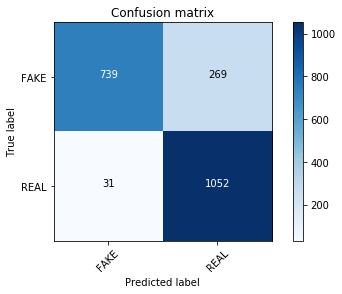

In [19]:
# Drawing Confusion Matrix With TfIdf Vectorizer
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.893
Confusion matrix, without normalization


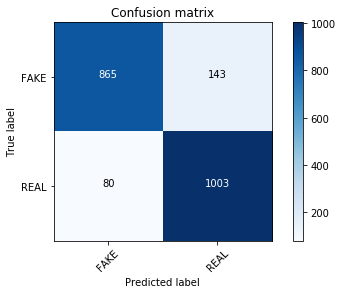

In [20]:
# Drawing Confusion Matrix With Bag Of Words (Count Vectorizer)
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [21]:
# Testing Linear Models
# Drawing Confusion Matrix With Passive Agressive Classifier
linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

TypeError: __init__() got an unexpected keyword argument 'n_iter'

In [22]:
# Introspecting models
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    reference: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)


NameError: name 'linear_clf' is not defined

In [23]:
feature_names = tfidf_vectorizer.get_feature_names()

In [24]:
# Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-4.477148234163137, 'said'),
 (-4.5936919152219655, 'trump'),
 (-4.98170150128453, 'clinton'),
 (-5.455931002028523, 'people'),
 (-5.482207812723569, 'president'),
 (-5.511414074572205, 'obama'),
 (-5.515621480853161, 'state'),
 (-5.5727798946931095, 'new'),
 (-5.63452121120962, 'campaign'),
 (-5.728156816243612, 'republican'),
 (-5.844483857160232, 'party'),
 (-5.949002396420198, 'sanders'),
 (-5.964034477506528, 'states'),
 (-5.97418288622825, 'time'),
 (-5.986816295469049, 'just'),
 (-5.9903983888515535, 'like'),
 (-6.067024557833956, 'house'),
 (-6.115534950553315, 'political'),
 (-6.126896127062493, 'percent'),
 (-6.172241591175732, 'republicans')]

In [25]:
# Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-13.817639290604365, '0000'),
 (-13.817639290604365, '000035'),
 (-13.817639290604365, '0001'),
 (-13.817639290604365, '0001pt'),
 (-13.817639290604365, '000km'),
 (-13.817639290604365, '0011'),
 (-13.817639290604365, '006s'),
 (-13.817639290604365, '007'),
 (-13.817639290604365, '007s'),
 (-13.817639290604365, '008s'),
 (-13.817639290604365, '0099'),
 (-13.817639290604365, '00am'),
 (-13.817639290604365, '00p'),
 (-13.817639290604365, '00pm'),
 (-13.817639290604365, '014'),
 (-13.817639290604365, '015'),
 (-13.817639290604365, '018'),
 (-13.817639290604365, '01am'),
 (-13.817639290604365, '020'),
 (-13.817639290604365, '023')]

In [26]:
# extract the full list from your current classifier and take a look at each token 
# or easily compare tokens from classifier to classifier)
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))
for i in tokens_with_weights:
    print(i)
    break

('00', -11.178581960989106)


# Further Tasks
## Using another algorithm: HashingVectorizer
**Another vectorizer used sometimes for text classification is a HashingVectorizer. HashingVectorizers require less memory and are faster (because they are sparse and use hashes rather than tokens) but are more difficult to introspect.**

In [32]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

NameError: name 'HashingVectorizer' is not defined

In [ ]:
clf = MultinomialNB(alpha=.01)

In [ ]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
clf = PassiveAggressiveClassifier(n_iter=50)

In [ ]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])